In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Factor Analysis on AI and Human Enhancement Survey Data

Welcome to this project, where I will delve into factor analysis using the [American Trends Panel Wave 99 dataset from Pew Research Center](https://www.pewresearch.org/internet/dataset/american-trends-panel-wave-99/).

In today's data-driven world, the ability to extract meaningful insights from large volumes of information is an essential skill. This project is designed to demonstrate my proficiency in factor analysis, a statistical technique widely used in psychology, social sciences, and in the market research world, where the goal is to identify underlying relationships between measured variables.

The objective of this project is to extract meaningful factors from the [American Trends Panel Wave 99 Pew Research dataset](https://www.pewresearch.org/internet/dataset/american-trends-panel-wave-99/) using factor analysis. This dataset, with its breadth of variables, provides a nice playground for factor analysis, which will help us uncover any latent variables influencing the responses.

Throughout this analysis, I've employed Python along with several of its libraries, including pandas for data manipulation, matplotlib and seaborn for data visualization, factor_analyzer for the factor analysis, and pingouin for Cronbach's alpha.

I invite you to explore this project further. Here, you'll find detailed steps of the entire data analysis process -- from data pre-processing, exploratory data analysis, making necessary assumptions for factor analysis, conducting factor analysis, to the interpretation of the results. I've taken care to describe each step in markdown, helping to provide a clear understanding of my thought process and the techniques used.

Whether you are a fellow data enthusiast looking to exchange ideas, a recruiter evaluating my abilities, or someone with a general interest in data analysis, I hope you find this project insightful and engaging. Your comments, suggestions, and queries are most welcome. Please feel free to [reach out](mailto:lbatleah@gmail.com). Let's dive in!

##  1.) Read in the Data and Explore its Contents

Pew Research Center makes its data available in .sav format, presumably to be used with SPSS software. Fortunately we can read this data in using pandas. 

In [2]:
df = pd.read_spss("W99_Nov21/ATP W99.sav")

Great! Now let's see what's in here:

In [3]:
df.head()

,QKEY,INTERVIEW_START_W99,INTERVIEW_END_W99,DEVICE_TYPE_W99,LANG_W99,FORM_W99,XTABLET_W99,TECH1_W99,SC1_W99,CNCEXC_W99,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
0,100260.0,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,Equally concerned and excited,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,100314.0,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,More excited than concerned,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,100363.0,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,Equally concerned and excited,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,100598.0,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,Equally concerned and excited,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,100637.0,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Equal positive and negative effects,Equally concerned and excited,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606


214 columns! Let's see how many rows.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Columns: 214 entries, QKEY to WEIGHT_W99
dtypes: category(210), datetime64[ns](2), float64(2)
memory usage: 2.4 MB


What are all these columns? I only want the answers to survey questions. Let's browse to get a sense of what we have.

In [5]:
df.columns.tolist()

['QKEY',
 'INTERVIEW_START_W99',
 'INTERVIEW_END_W99',
 'DEVICE_TYPE_W99',
 'LANG_W99',
 'FORM_W99',
 'XTABLET_W99',
 'TECH1_W99',
 'SC1_W99',
 'CNCEXC_W99',
 'EXCITEOE_W99_OE1',
 'EXCITEOE_W99_OE2',
 'EXCITEOE_W99_OE3',
 'EXCITEOE_REFUSED_W99',
 'CONCERNOE_W99_OE1',
 'CONCERNOE_W99_OE2',
 'CONCERNOE_W99_OE3',
 'CONCERNOE_REFUSED_W99',
 'ALGFAIR_W99',
 'DISCRIM1_a_W99',
 'DISCRIM1_b_W99',
 'DISCRIM1_c_W99',
 'DISCRIM1_d_W99',
 'DISCRIM1_e_W99',
 'DISCRIM1_f_W99',
 'POSNEGAI_a_W99',
 'POSNEGAI_b_W99',
 'POSNEGAI_c_W99',
 'POSNEGAI_d_W99',
 'POSNEGAI_e_W99',
 'POSNEGAI_f_W99',
 'POSNEGHE_a_W99',
 'POSNEGHE_b_W99',
 'POSNEGHE_c_W99',
 'POSNEGHE_d_W99',
 'POSNEGHE_e_W99',
 'POSNEGHE_f_W99',
 'SMALG1_W99',
 'SMALG2_W99',
 'SMALG3_W99',
 'SMALG4_a_W99',
 'SMALG4_b_W99',
 'SMALG4_c_W99',
 'SMALG4_d_W99',
 'SMALG5_W99',
 'SMALG6_W99',
 'SMALG7_W99',
 'SMALG8_W99',
 'SMALG9_a_W99',
 'SMALG9_b_W99',
 'SMALG9_c_W99',
 'SMALG10_a_W99',
 'SMALG10_b_W99',
 'SMALG10_c_W99',
 'SMALG11_W99',
 'SMALG12_

Let's quickly check to see if any of these have no missing values.

In [6]:
df_isnull = pd.DataFrame(df.isnull().sum().sort_values())
df_isnull

,0
QKEY,0
POSNEGHE_e_W99,0
POSNEGHE_f_W99,0
F_INC_TIER2,0
F_RELCOM3CAT,0
...,...
F_HISP_ORIGIN,8802
CONCERNOE_W99_OE2,9573
EXCITEOE_W99_OE2,9923
CONCERNOE_W99_OE3,10162


Great! For simplicity, let's create a new dataframe for all the fields that have no missing values.

In [7]:
df_nonull = df_isnull[df_isnull[0] == 0]

And let's see what we're left with:

In [8]:
df_nonull.index

Index(['QKEY', 'POSNEGHE_e_W99', 'POSNEGHE_f_W99', 'F_INC_TIER2',
       'F_RELCOM3CAT', 'F_METRO', 'F_CREGION', 'F_CDIVISION', 'F_AGECAT',
       'F_GENDER', 'F_EDUCCAT', 'F_EDUCCAT2', 'F_HISP', 'F_YEARSINUS',
       'F_RACECMB', 'F_RACETHNMOD', 'F_CITIZEN', 'F_BIRTHPLACE', 'F_MARITAL',
       'F_RELIG', 'F_RELIGCAT1', 'F_ATTEND', 'F_RELIMP', 'F_PRAY',
       'F_PARTY_FINAL', 'F_PARTYSUM_FINAL', 'F_PARTYSUMIDEO_FINAL',
       'F_INC_SDT1', 'F_IDEO', 'F_VOLSUM', 'POSNEGHE_d_W99', 'POSNEGHE_c_W99',
       'WEIGHT_W99', 'POSNEGHE_a_W99', 'POSNEGAI_c_W99', 'POSNEGAI_b_W99',
       'POSNEGAI_a_W99', 'DISCRIM1_f_W99', 'DISCRIM1_e_W99', 'DISCRIM1_d_W99',
       'DISCRIM1_c_W99', 'DISCRIM1_b_W99', 'DISCRIM1_a_W99', 'ALGFAIR_W99',
       'CONCERNOE_REFUSED_W99', 'EXCITEOE_REFUSED_W99', 'POSNEGHE_b_W99',
       'CNCEXC_W99', 'XTABLET_W99', 'FORM_W99', 'LANG_W99', 'DEVICE_TYPE_W99',
       'INTERVIEW_END_W99', 'POSNEGAI_f_W99', 'INTERVIEW_START_W99',
       'POSNEGAI_d_W99', 'POSNEGAI_e_W99'],
 

Most of these aren't answers to survey questions. Let's doublecheck the ones that should all be survey questions:

In [9]:
df_all_answered = df[['POSNEGHE_a_W99', 'POSNEGHE_b_W99', 'POSNEGHE_c_W99', 'POSNEGHE_d_W99', 'POSNEGHE_e_W99', 'POSNEGHE_f_W99', 
       'POSNEGAI_a_W99', 'POSNEGAI_b_W99', 'POSNEGAI_c_W99', 'POSNEGAI_d_W99', 'POSNEGAI_e_W99', 'POSNEGAI_f_W99', 
       'DISCRIM1_a_W99', 'DISCRIM1_b_W99', 'DISCRIM1_c_W99', 'DISCRIM1_d_W99', 'DISCRIM1_e_W99', 'DISCRIM1_f_W99', 
       'ALGFAIR_W99', 
       'CNCEXC_W99']]

Great! Now let's see what these questions were. Based on Pew's documentation, it looks like they were:

ASK ALL:
POSNEGHE
How excited or concerned would you be about potential new techniques that could change human abilities in the following ways? (RANDOMIZE ITEMS)

    a. Slow the aging process to allow the average person to live decades longer
    b. Allow some people to far more quickly and accurately process information
    c. Prevent some people from getting serious diseases or health conditions
    d. Allow some people greatly increased strength for lifting heavy objects
    e. Allow some people to see shapes and patterns in crowded spaces far beyond what the typical person can see today
    f. Allow some people to hear sounds far beyond what the typical person can hear today
    
RESPONSE OPTIONS:

    1 Very excited
    2 Somewhat excited
    3 Equal excitement and concern
    4 Somewhat concerned
    5 Very concerned
    
    
ASK ALL:
POSNEGAI
How excited or concerned would you be if artificial intelligence computer programs could do each of the following? (RANDOMIZE ITEMS)

    a. Know people’s thoughts and behaviors
    b. Perform household chores
    c. Make important life decisions for people
    d. Diagnose medical problems
    e. Perform repetitive workplace tasks
    f. Handle customer service calls
    
RESPONSE OPTIONS:

    1 Very excited
    2 Somewhat excited
    3 Equal excitement and concern
    4 Somewhat concerned
    5 Very concerned
    
    
ASK ALL:
DISCRIM1
Thinking about the people who design artificial intelligence computer programs, how well do you think they take into account the experiences and views of each of the following? (RANDOMIZE a-d AND e-f IN BLOCKS; RANDOMIZE ORDER OF BLOCKS; SHOW BLOCKS ON SEPARATE PAGES)

    a. White adults
    b. Black adults
    c. Hispanic adults
    d. Asian adults
    e. Men
    f. Women
    
RESPONSE OPTIONS:

    1 Very well
    2 Somewhat well
    3 Not too well
    4 Not at all well
    (SPACE)
    5 Not sure
    
ASK ALL:
ALGFAIR    
Do you think it is possible or not possible for people to design artificial intelligence computer programs that can consistently make fair decisions in complex situations?

    1 Possible
    2 Not possible
    (SPACE)
    3 Not sure
    
    
Artificial intelligence computer programs are designed to learn tasks that humans typically do, for instance recognizing speech or pictures. Overall, would you say the increased use of artificial intelligence computer programs in daily life makes you feel... (RANDOMIZE RESPONSE OPTIONS 1 AND 2, WITH OPTION 3 ALWAYS LAST)
RESPONSE OPTIONS:

    1 More excited than concerned
    2 More concerned than excited
    3 Equally concerned and excited (ANCHOR)

## 2.) Data Cleaning and Transformation

Do the response options check out with our value counts?

In [10]:
df_all_answered["POSNEGHE_a_W99"].value_counts()

Equal excitement and concern    3045
Very excited                    2227
Somewhat excited                2054
Somewhat concerned              1537
Very concerned                  1343
Refused                           54
Name: POSNEGHE_a_W99, dtype: int64

What are these "Refused" answers? I only want records where we have an answer for every question from every respondent.

In [11]:
df_all_answered[df_all_answered["POSNEGHE_a_W99"] == "Refused"]

,POSNEGHE_a_W99,POSNEGHE_b_W99,POSNEGHE_c_W99,POSNEGHE_d_W99,POSNEGHE_e_W99,POSNEGHE_f_W99,POSNEGAI_a_W99,POSNEGAI_b_W99,POSNEGAI_c_W99,POSNEGAI_d_W99,POSNEGAI_e_W99,POSNEGAI_f_W99,DISCRIM1_a_W99,DISCRIM1_b_W99,DISCRIM1_c_W99,DISCRIM1_d_W99,DISCRIM1_e_W99,DISCRIM1_f_W99,ALGFAIR_W99,CNCEXC_W99
6,Refused,Somewhat concerned,Somewhat concerned,Somewhat concerned,Somewhat concerned,Somewhat concerned,Very concerned,Very concerned,Very concerned,Very concerned,Very concerned,Very concerned,Not too well,Not too well,Not too well,Not too well,Not too well,Not too well,Not possible,More concerned than excited
87,Refused,Very concerned,Somewhat excited,Equal excitement and concern,Somewhat concerned,Somewhat excited,Very concerned,Equal excitement and concern,Somewhat concerned,Somewhat excited,Equal excitement and concern,Equal excitement and concern,Not sure,Not sure,Not sure,Not sure,Not sure,Not sure,Not possible,More concerned than excited
140,Refused,Refused,Refused,Refused,Refused,Refused,Very concerned,Somewhat concerned,Very concerned,Equal excitement and concern,Equal excitement and concern,Somewhat excited,Not sure,Not sure,Not sure,Not sure,Not sure,Not sure,Not sure,More concerned than excited
417,Refused,Very concerned,Very concerned,Very concerned,Very concerned,Very concerned,Very concerned,Very concerned,Refused,Very concerned,Very concerned,Very concerned,Not sure,Not sure,Not sure,Not sure,Not sure,Not sure,Not possible,More concerned than excited
490,Refused,Very excited,Very excited,Very excited,Very excited,Somewhat excited,Somewhat concerned,Equal excitement and concern,Very concerned,Equal excitement and concern,Equal excitement and concern,Very concerned,Not sure,Not sure,Not sure,Not sure,Not sure,Not sure,Not sure,Refused
1008,Refused,Refused,Somewhat excited,Refused,Refused,Somewhat concerned,Somewhat concerned,Somewhat excited,Somewhat concerned,Somewhat excited,Somewhat concerned,Somewhat excited,Somewhat well,Not too well,Somewhat well,Somewhat well,Not sure,Not sure,Not sure,More concerned than excited
1224,Refused,Somewhat excited,Somewhat excited,Refused,Equal excitement and concern,Equal excitement and concern,Very concerned,Somewhat concerned,Somewhat concerned,Very concerned,Somewhat concerned,Equal excitement and concern,Not too well,Not too well,Not sure,Not sure,Not too well,Not too well,Not possible,Equally concerned and excited
1458,Refused,Equal excitement and concern,Somewhat excited,Somewhat excited,Equal excitement and concern,Somewhat excited,Somewhat excited,Very excited,Equal excitement and concern,Somewhat excited,Equal excitement and concern,Somewhat excited,Not too well,Not too well,Not too well,Not too well,Somewhat well,Somewhat well,Possible,More concerned than excited
1519,Refused,Refused,Very excited,Refused,Refused,Refused,Very concerned,Refused,Very concerned,Somewhat excited,Refused,Somewhat concerned,Refused,Refused,Refused,Refused,Refused,Refused,Not possible,Equally concerned and excited
1592,Refused,Very concerned,Very concerned,Very concerned,Very concerned,Very concerned,Very concerned,Very concerned,Very concerned,Very concerned,Very concerned,Very concerned,Not at all well,Not at all well,Not at all well,Not at all well,Not at all well,Not at all well,Not possible,More concerned than excited


Let's drop all the rows with a "Refused" answer to any of the questions:

In [12]:
df_all_answered_drop_ref = df_all_answered[df_all_answered.ne("Refused").all(axis=1)]

Let's rename it so it's easier to work with:

In [13]:
df_aadr = df_all_answered_drop_ref

In [14]:
df_aadr

,POSNEGHE_a_W99,POSNEGHE_b_W99,POSNEGHE_c_W99,POSNEGHE_d_W99,POSNEGHE_e_W99,POSNEGHE_f_W99,POSNEGAI_a_W99,POSNEGAI_b_W99,POSNEGAI_c_W99,POSNEGAI_d_W99,POSNEGAI_e_W99,POSNEGAI_f_W99,DISCRIM1_a_W99,DISCRIM1_b_W99,DISCRIM1_c_W99,DISCRIM1_d_W99,DISCRIM1_e_W99,DISCRIM1_f_W99,ALGFAIR_W99,CNCEXC_W99
0,Somewhat excited,Somewhat concerned,Somewhat excited,Equal excitement and concern,Equal excitement and concern,Somewhat excited,Very concerned,Equal excitement and concern,Very concerned,Equal excitement and concern,Somewhat concerned,Somewhat concerned,Not too well,Very well,Very well,Very well,Not sure,Not sure,Not possible,Equally concerned and excited
1,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Somewhat excited,Equal excitement and concern,Very well,Not too well,Not too well,Not sure,Somewhat well,Very well,Possible,More excited than concerned
2,Somewhat excited,Somewhat concerned,Very excited,Somewhat concerned,Somewhat concerned,Somewhat concerned,Somewhat concerned,Very excited,Somewhat concerned,Equal excitement and concern,Somewhat excited,Very concerned,Somewhat well,Somewhat well,Somewhat well,Somewhat well,Very well,Somewhat well,Not possible,Equally concerned and excited
3,Somewhat excited,Somewhat excited,Somewhat excited,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Very concerned,Somewhat excited,Very concerned,Equal excitement and concern,Somewhat excited,Equal excitement and concern,Not sure,Not sure,Not sure,Not sure,Not sure,Not sure,Not possible,Equally concerned and excited
4,Equal excitement and concern,Somewhat concerned,Very excited,Equal excitement and concern,Somewhat concerned,Somewhat excited,Very concerned,Very excited,Very concerned,Very concerned,Somewhat excited,Somewhat concerned,Not sure,Not sure,Not sure,Not sure,Very well,Not sure,Not sure,Equally concerned and excited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,Very concerned,Very concerned,Very excited,Very concerned,Very concerned,Very concerned,Very concerned,Very excited,Very concerned,Very concerned,Very concerned,Very concerned,Not sure,Not sure,Not sure,Not sure,Not sure,Not sure,Not possible,More concerned than excited
10256,Somewhat concerned,Somewhat concerned,Somewhat excited,Somewhat excited,Equal excitement and concern,Equal excitement and concern,Very concerned,Somewhat excited,Equal excitement and concern,Very excited,Somewhat concerned,Somewhat excited,Not sure,Not sure,Not sure,Not sure,Somewhat well,Not too well,Possible,Equally concerned and excited
10257,Very excited,Very excited,Very excited,Very excited,Very excited,Very excited,Very excited,Very excited,Very excited,Very excited,Very excited,Very excited,Very well,Very well,Very well,Very well,Not at all well,Very well,Possible,More concerned than excited
10258,Very excited,Somewhat excited,Very excited,Equal excitement and concern,Somewhat excited,Somewhat excited,Equal excitement and concern,Very excited,Equal excitement and concern,Very excited,Somewhat excited,Somewhat excited,Very well,Very well,Very well,Very well,Very well,Very well,Possible,More excited than concerned


Now let's replace all these with integers so we can do factor analysis:

In [15]:
df_aadr = df_aadr.copy()
for column in df_aadr.columns:
    df_aadr[column].replace(["Very concerned", "Somewhat concerned", "Equal excitement and concern", "Somewhat excited", "Very excited"],[1, 2, 3, 4, 5], inplace=True)

In [16]:
for column in df_aadr.columns:
    df_aadr[column].replace(["Not at all well", "Not too well", "Not sure", "Somewhat well", "Very well"],[1, 2, 3, 4, 5], inplace=True)

In [17]:
df_aadr["ALGFAIR_W99"].replace(["Not possible", "Possible"],[2, 4], inplace=True)

In [18]:
df_aadr["CNCEXC_W99"].replace(["More concerned than excited", "Equally concerned and excited", "More excited than concerned"],[2, 3, 4], inplace=True)

Take a look at our transformed dataframe:

In [19]:
df_aadr

,POSNEGHE_a_W99,POSNEGHE_b_W99,POSNEGHE_c_W99,POSNEGHE_d_W99,POSNEGHE_e_W99,POSNEGHE_f_W99,POSNEGAI_a_W99,POSNEGAI_b_W99,POSNEGAI_c_W99,POSNEGAI_d_W99,POSNEGAI_e_W99,POSNEGAI_f_W99,DISCRIM1_a_W99,DISCRIM1_b_W99,DISCRIM1_c_W99,DISCRIM1_d_W99,DISCRIM1_e_W99,DISCRIM1_f_W99,ALGFAIR_W99,CNCEXC_W99
0,4,2,4,3,3,4,1,3,1,3,2,2,2,5,5,5,3,3,2,3
1,3,3,3,3,3,3,3,3,3,3,4,3,5,2,2,3,4,5,4,4
2,4,2,5,2,2,2,2,5,2,3,4,1,4,4,4,4,5,4,2,3
3,4,4,4,3,3,3,1,4,1,3,4,3,3,3,3,3,3,3,2,3
4,3,2,5,3,2,4,1,5,1,1,4,2,3,3,3,3,5,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,1,1,5,1,1,1,1,5,1,1,1,1,3,3,3,3,3,3,2,2
10256,2,2,4,4,3,3,1,4,3,5,2,4,3,3,3,3,4,2,4,3
10257,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,5,4,2
10258,5,4,5,3,4,4,3,5,3,5,4,4,5,5,5,5,5,5,4,4


The problem is our data type is still categorical rather than int64: 

In [20]:
df_aadr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9725 entries, 0 to 10259
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   POSNEGHE_a_W99  9725 non-null   category
 1   POSNEGHE_b_W99  9725 non-null   category
 2   POSNEGHE_c_W99  9725 non-null   category
 3   POSNEGHE_d_W99  9725 non-null   category
 4   POSNEGHE_e_W99  9725 non-null   category
 5   POSNEGHE_f_W99  9725 non-null   category
 6   POSNEGAI_a_W99  9725 non-null   category
 7   POSNEGAI_b_W99  9725 non-null   category
 8   POSNEGAI_c_W99  9725 non-null   category
 9   POSNEGAI_d_W99  9725 non-null   category
 10  POSNEGAI_e_W99  9725 non-null   category
 11  POSNEGAI_f_W99  9725 non-null   category
 12  DISCRIM1_a_W99  9725 non-null   category
 13  DISCRIM1_b_W99  9725 non-null   category
 14  DISCRIM1_c_W99  9725 non-null   category
 15  DISCRIM1_d_W99  9725 non-null   category
 16  DISCRIM1_e_W99  9725 non-null   category
 17  DISCRIM1_f_W9

Let's convert everything:

In [21]:
for column in df_aadr.columns:
    df_aadr[column] = pd.to_numeric(df_aadr[column])

Now we should be good:

In [22]:
df_aadr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9725 entries, 0 to 10259
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   POSNEGHE_a_W99  9725 non-null   int64
 1   POSNEGHE_b_W99  9725 non-null   int64
 2   POSNEGHE_c_W99  9725 non-null   int64
 3   POSNEGHE_d_W99  9725 non-null   int64
 4   POSNEGHE_e_W99  9725 non-null   int64
 5   POSNEGHE_f_W99  9725 non-null   int64
 6   POSNEGAI_a_W99  9725 non-null   int64
 7   POSNEGAI_b_W99  9725 non-null   int64
 8   POSNEGAI_c_W99  9725 non-null   int64
 9   POSNEGAI_d_W99  9725 non-null   int64
 10  POSNEGAI_e_W99  9725 non-null   int64
 11  POSNEGAI_f_W99  9725 non-null   int64
 12  DISCRIM1_a_W99  9725 non-null   int64
 13  DISCRIM1_b_W99  9725 non-null   int64
 14  DISCRIM1_c_W99  9725 non-null   int64
 15  DISCRIM1_d_W99  9725 non-null   int64
 16  DISCRIM1_e_W99  9725 non-null   int64
 17  DISCRIM1_f_W99  9725 non-null   int64
 18  ALGFAIR_W99     9725 non-nu

## 3.) Factor Analysis

We finally have the data in usable shape!

Let's check correlations to make sure nothing is perfectly correlated.

<AxesSubplot:>

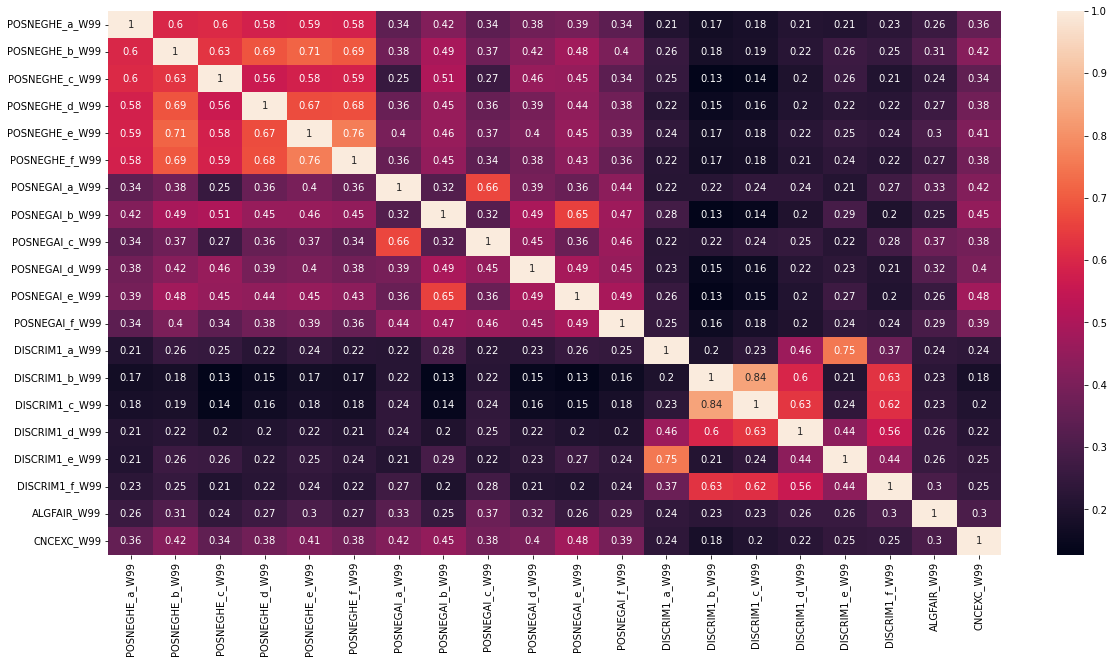

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df_aadr.corr(), annot=True)

Let's use Bartlett's Test of Sphericity to make sure our correlation coefficients are not all 0. A p value of < .05 indicates we can proceed with factor analysis.

In [24]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_aadr)
chi_square_value, p_value

(109435.39913744062, 0.0)

We'll also use the Kaiser-Meyer-Olkin test to see how well suited our data is for factor analysis. The KMO Measure of Sampling Adequacy is a statistic that reflects the proportion of variance in the factors that might be caused by underlying factors. Generally high values (close to 1) indicate that factor analysis may be useful.

In [25]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_aadr)

In [26]:
kmo_model

0.9149711629759515

Alright, it looks like we should proceed!

In [27]:
from factor_analyzer import FactorAnalyzer

Let's start with three factors since the data is mostly grouped into the three categories.

In [28]:
fa = FactorAnalyzer(n_factors=3, method="ml")

One factor explains most of the variance!

In [29]:
fa.fit(df_aadr)
ev, v = fa.get_eigenvalues()
ev

array([7.59543743, 2.66547544, 1.41258409, 1.36080669, 0.95420962,
       0.7343257 , 0.64572055, 0.57409383, 0.49592582, 0.47998303,
       0.44638238, 0.37086671, 0.35025149, 0.34467983, 0.33453964,
       0.3231594 , 0.28893958, 0.23464381, 0.22863429, 0.15934066])

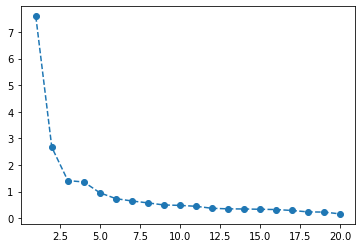

In [30]:
plt.plot(range(1,df_aadr.shape[1]+1),ev, 'o--')

But four factors have Eigenvalues of more than 1, so let's use four factors.

In [31]:
fa = FactorAnalyzer(n_factors=4, method="ml")

In [32]:
fa.fit(df_aadr)

FactorAnalyzer(method='ml', n_factors=4, rotation_kwargs={})

In [33]:
loadings = fa.loadings_
loadings

array([[ 0.69207366,  0.04160647,  0.04387105, -0.04207554],
       [ 0.8260323 ,  0.02201573,  0.01691706, -0.01106296],
       [ 0.7236792 , -0.01398786, -0.03332562,  0.06367312],
       [ 0.80239277,  0.01477698,  0.00838243, -0.04022815],
       [ 0.87135451, -0.01969493,  0.02453958, -0.03429875],
       [ 0.91417316, -0.09027145,  0.03277995, -0.04063189],
       [-0.09501733,  0.7961661 ,  0.0460563 , -0.09162214],
       [ 0.2809496 ,  0.41833727, -0.08992821,  0.09302654],
       [-0.1455687 ,  0.85379339,  0.04134043, -0.08716725],
       [ 0.10408415,  0.60122659, -0.05327107, -0.00296402],
       [ 0.21152626,  0.51593756, -0.0809677 ,  0.04616065],
       [ 0.00772421,  0.67322308, -0.03954024,  0.00649855],
       [-0.03844557, -0.03476913, -0.03900695,  0.90424049],
       [ 0.03166972, -0.02289551,  0.98635226, -0.18636446],
       [ 0.01215493,  0.00502026,  0.97216077, -0.14851566],
       [ 0.00149653, -0.01061979,  0.596186  ,  0.2683    ],
       [-0.02682741, -0.

Let's make that easier to read and evaluate.

In [34]:
df_loadings = pd.DataFrame(loadings)

In [35]:
df_loadings.columns = ["Factor1", "Factor2", "Factor3", "Factor4"]
df_loadings.index = df_aadr.columns

In [36]:
df_loadings

,Factor1,Factor2,Factor3,Factor4
POSNEGHE_a_W99,0.692074,0.041606,0.043871,-0.042076
POSNEGHE_b_W99,0.826032,0.022016,0.016917,-0.011063
POSNEGHE_c_W99,0.723679,-0.013988,-0.033326,0.063673
POSNEGHE_d_W99,0.802393,0.014777,0.008382,-0.040228
POSNEGHE_e_W99,0.871355,-0.019695,0.024540,-0.034299
POSNEGHE_f_W99,0.914173,-0.090271,0.032780,-0.040632
POSNEGAI_a_W99,-0.095017,0.796166,0.046056,-0.091622
POSNEGAI_b_W99,0.280950,0.418337,-0.089928,0.093027
POSNEGAI_c_W99,-0.145569,0.853793,0.041340,-0.087167
POSNEGAI_d_W99,0.104084,0.601227,-0.053271,-0.002964


Interesting! 

The questions about AI and human abilities (POSNEGHE questions) all seem to be loading on the same factor or measuring the same latent variable.

The second factor is driving most of the variance on all the questions about attitude toward AI's potential capabilities, although b (Perform household chores) and e (Perform repetitive workplace tasks) have slightly weaker loadings than the rest, which suggests they're not ideal measures for that latent variable.

Perhaps most interesting here is that the questions about potential discrimination are actually measuring two different latent variables--attitude about representation of men and Whites is decoupled from attitude about representation of Blacks, Hispanics, Asians, and women. 

Let's look at the factor variance:

In [37]:
fa.get_factor_variance()

(array([4.10843572, 3.03758515, 2.68854131, 1.88767637]),
 array([0.20542179, 0.15187926, 0.13442707, 0.09438382]),
 array([0.20542179, 0.35730104, 0.49172811, 0.58611193]))

These arrays reflect the SS loadings, the proportional variance, and the cumulative variance. Our 4 factors explain 58% of the variance in the answers to these questions. 

Now we'll transform the data so that the factor scores can be used for modeling:

In [38]:
df_factor_scores = pd.DataFrame(fa.fit_transform(df_aadr))
df_factor_scores.columns = ["Attitude Toward AI & Abilities", "Attitude Toward AI's Potential", "Attitude Toward Representation of Minorities in AI", "Attitude Toward Representation of Men & Whites in AI"]

In [39]:
df_factor_scores

,Attitude Toward AI & Abilities,Attitude Toward AI's Potential,Attitude Toward Representation of Minorities in AI,Attitude Toward Representation of Men & Whites in AI
0,-0.250321,-0.714464,1.797864,-0.808621
1,-0.228400,0.863577,-0.310955,0.887580
2,-0.642809,0.038428,1.208213,0.903289
3,0.045457,-0.253030,0.036956,-0.473165
4,-0.242183,-0.460729,0.159178,0.424695
...,...,...,...,...
9720,-1.756352,-1.331427,0.028453,-0.614393
9721,-0.306287,0.394104,0.055971,-0.065927
9722,1.515980,2.401787,2.115139,-0.164053
9723,0.790785,1.613927,2.319619,1.587811


Let's see how these four factors are correlated:

In [40]:
df_factor_scores.corr()

,Attitude Toward AI & Abilities,Attitude Toward AI's Potential,Attitude Toward Representation of Minorities in AI,Attitude Toward Representation of Men & Whites in AI
Attitude Toward AI & Abilities,1.000000,0.763229,0.281153,0.453138
Attitude Toward AI's Potential,0.763229,1.000000,0.418845,0.550612
Attitude Toward Representation of Minorities in AI,0.281153,0.418845,1.000000,0.497053
Attitude Toward Representation of Men & Whites in AI,0.453138,0.550612,0.497053,1.000000


As a final check, we'll use Cronbach's alpha to see if the factors are internally consistent:

In [41]:
import pingouin as pg

In [42]:
factor1 = df_aadr[['POSNEGHE_a_W99', 'POSNEGHE_b_W99', 'POSNEGHE_c_W99', 'POSNEGHE_d_W99', 'POSNEGHE_e_W99', 'POSNEGHE_f_W99']]
factor2 = df_aadr[['POSNEGAI_a_W99', 'POSNEGAI_b_W99', 'POSNEGAI_c_W99', 'POSNEGAI_d_W99', 'POSNEGAI_e_W99', 'POSNEGAI_f_W99', 
                   'ALGFAIR_W99', 
                   'CNCEXC_W99']]
factor3 = df_aadr[['DISCRIM1_b_W99', 'DISCRIM1_c_W99', 'DISCRIM1_d_W99', 'DISCRIM1_f_W99']]
factor4 = df_aadr[['DISCRIM1_a_W99', 'DISCRIM1_e_W99']]

In [43]:
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
factor4_alpha = pg.cronbach_alpha(factor4)

print(factor1_alpha, factor2_alpha, factor3_alpha, factor4_alpha)

(0.9120868882656981, array([0.909, 0.915])) (0.8433737625868725, array([0.839, 0.848])) (0.8785476102287166, array([0.875, 0.882])) (0.8598254314655531, array([0.854, 0.865]))


Since all alphas are above .8, we can consider these reliable measures of the factors. 